#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [23]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing the libraries


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [25]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [27]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


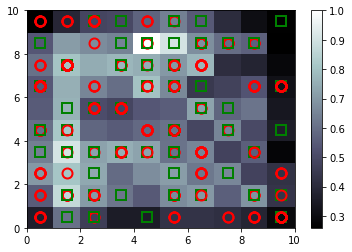

In [28]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [29]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [30]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15796813
15631685
15753591
15731166
15649379
15797246
15729771
15614813
15701687
15706268
15653147
15735572
15751167
15778142
15721507
15625501
15812918
15715519
15630592
15812766
15784526
15687765
15589541
15757306
15598574
15769356
15808223
15786237
15767358
15567839
15579583
15642336
15740487
15811742
15702571
15622083
15715907
15768342
15748532
15689692
15672357
15788634


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [31]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [32]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [34]:
import tensorflow as tf
tf.__version__

'2.9.2'

## Initializing the ANN

In [35]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [43]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu', input_dim = 15))

## Adding the output layer

In [44]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [45]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [46]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.5824 - accuracy: 0.9391
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.9391


## Predicting test set results

In [40]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 2ms/step


In [41]:
print(y_pred)

[[1.57997850e+07 1.86534933e-07]
 [1.56214230e+07 7.84595329e-07]
 [1.58150400e+07 4.08878695e-05]
 ...
 [1.56710140e+07 2.60476232e-01]
 [1.55910100e+07 2.60476232e-01]
 [1.56220830e+07 2.60476232e-01]]
